## تحلیل دیتای پرواز به شهر واشنگتن 

#### ما برای مثال یه شرکتی هستیم که از یه طرف با شرکت هواپیمایی های مختلف و همچنین از طرف دیگر با شرکت های مختلف دیگه در حوزه های مختلف دیگه قرار داد داریم تا بهترین پرواز ها رو واسشون با کم ترین احتمال تاخیر انتخاب کنیم 
####   اول  5 تا شرکتی که بیشترین پرواز رو به واشنگتن داشتن رو انتخاب میکنیم بعدش بین این 5 تا دوتاشون رو که کمترین میزان میانگین تاخیر دارن رو انتخاب میکنیم که و در بعد میرم سراغ نموداری که برای میانگین هر ماه کشدیدم و بین این دوتا شرکت نگاه میکنیم که کدوم شرکت نمودار نرمال تر و با ثبات تری دارد و اون شرکت را برای پرواز به واشنگتن انتخاب میکنیم که در اینجا شرکت
## US Airways Inc 
#### دارای ثبات بالاتری است 
     ExpressJet Airlines Inc.  : 6117
     [ Average Flight Delay To Washington : 17.35]
     -----------------------------------------------
     US Airways Inc.           : 4716
     [ Average Flight Delay To Washington : 5.84]
     -----------------------------------------------
     Endeavor Air Inc.         : 2594
     [ Average Flight Delay To Washington : 3.63]
     -----------------------------------------------
     Envoy Air                 : 2559
     [ Average Flight Delay To Washington : 10.96]
     -----------------------------------------------
     JetBlue Airways           : 675
     [ Average Flight Delay To Washington : 12.81]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ExpressJet Airlines Inc.    6117
US Airways Inc.             4716
Endeavor Air Inc.           2594
Envoy Air                   2559
JetBlue Airways              675
Mesa Airlines Inc.           311
Southwest Airlines Co.       208
United Air Lines Inc.          3
Delta Air Lines Inc.           2
SkyWest Airlines Inc.          1
Name: name, dtype: int64


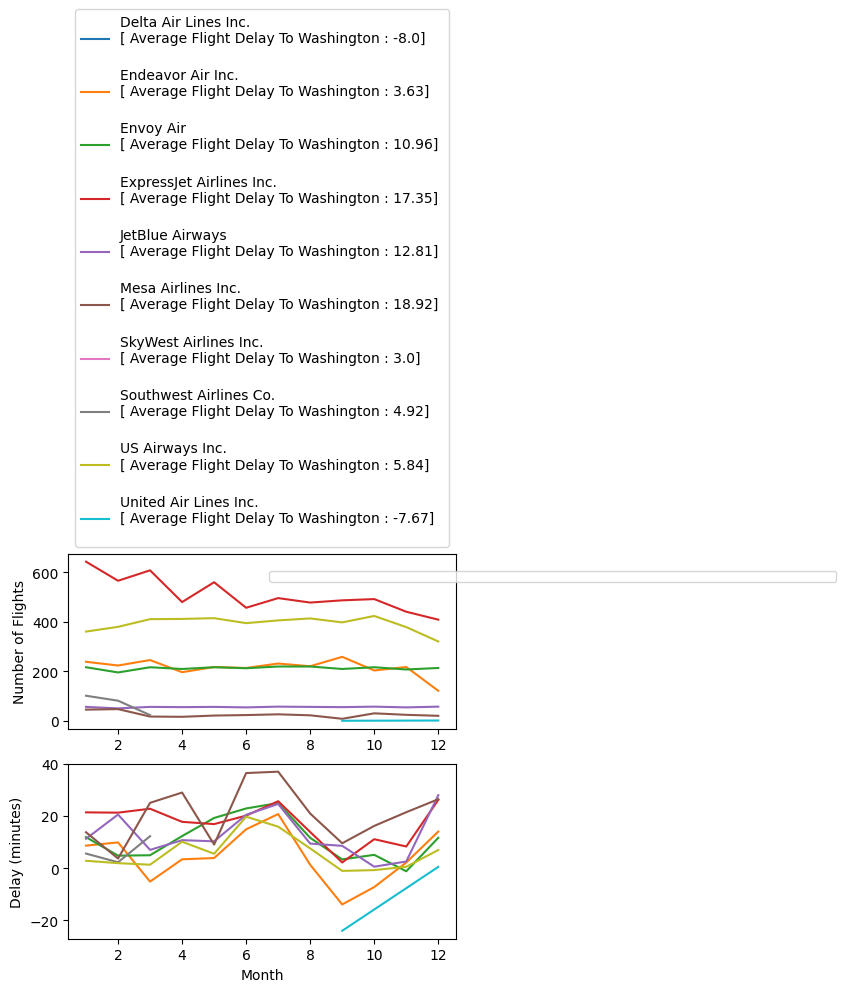

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('flights.csv')


data_for_airport_dest = data.query('dest == "BWI" or dest == "DCA" or dest == "IAD"')

print(data_for_airport_dest['name'].value_counts())

flights_per_month = data_for_airport_dest.groupby(['name', 'year', 'month'])['flight'].count().reset_index()

fig, ax = plt.subplots(2,figsize=(5, 5))

for carrier in flights_per_month['name'].unique():

    data = flights_per_month[flights_per_month['name'] == carrier] 

    Average_Flight_Delay = data_for_airport_dest[data_for_airport_dest['name'] == carrier]

    Average_Flight_Delay = Average_Flight_Delay['arr_delay'].mean()
    Average_Flight_Delay = float(format(Average_Flight_Delay, '.2f'))


    ax[0].plot(data['month'], data['flight'], label=carrier +"\n[ Average Flight Delay To Washington : "+str(Average_Flight_Delay)+']\n')

ax[0].set_ylabel('Number of Flights')
ax[0].legend(bbox_to_anchor=(0, 1, 1, 0.2), loc='lower left', mode='expand', ncol=1)
# نمودار برای میانگین هر ماه 
average_per_month = data_for_airport_dest.groupby(['name', 'year', 'month'])['arr_delay'].mean().reset_index()
for carrier in flights_per_month['name'].unique():

    data = average_per_month[average_per_month['name'] == carrier] 
    ax[1].plot(data['month'], data['arr_delay'])


ax[1].set_xlabel('Month')
ax[1].set_ylabel('Delay (minutes)')
ax[1].legend(bbox_to_anchor=(0.5, 2, 1.5, 0.2), loc='lower left', mode='expand', ncol=1)


plt.show()

## تحلیل ترافیک فرودگاه 

#### برای مثال ما یک شرکت هواپیمایی تازه تاسیس هستیم که میخواهیم ببینیم که بیشترین پرواز ها به چه فرودگاه هایی بودند تا فروند هواپیما بیشتری به آن شهر ها اختصاص بدهیم و برای اوایل تاسیس قیمت بلیط ها به مقصد این شهر را هم پایین تر در نظر بگیریم تا مشتری بیشتری نسبت به بقیه شرکت ها پیدا کنیم 

#### که ما در اینجا 5 فرودگاه زیر را در نظر میگیریم که به ترتیب مربوط به شهر های شیکاگو و آتلانتا و لس آنجلس و بوستون و اورلاندو هستند

    ORD  : 17283
    ATL  : 17215
    LAX  : 16174
    BOS  : 15508
    MCO  : 14082



ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64


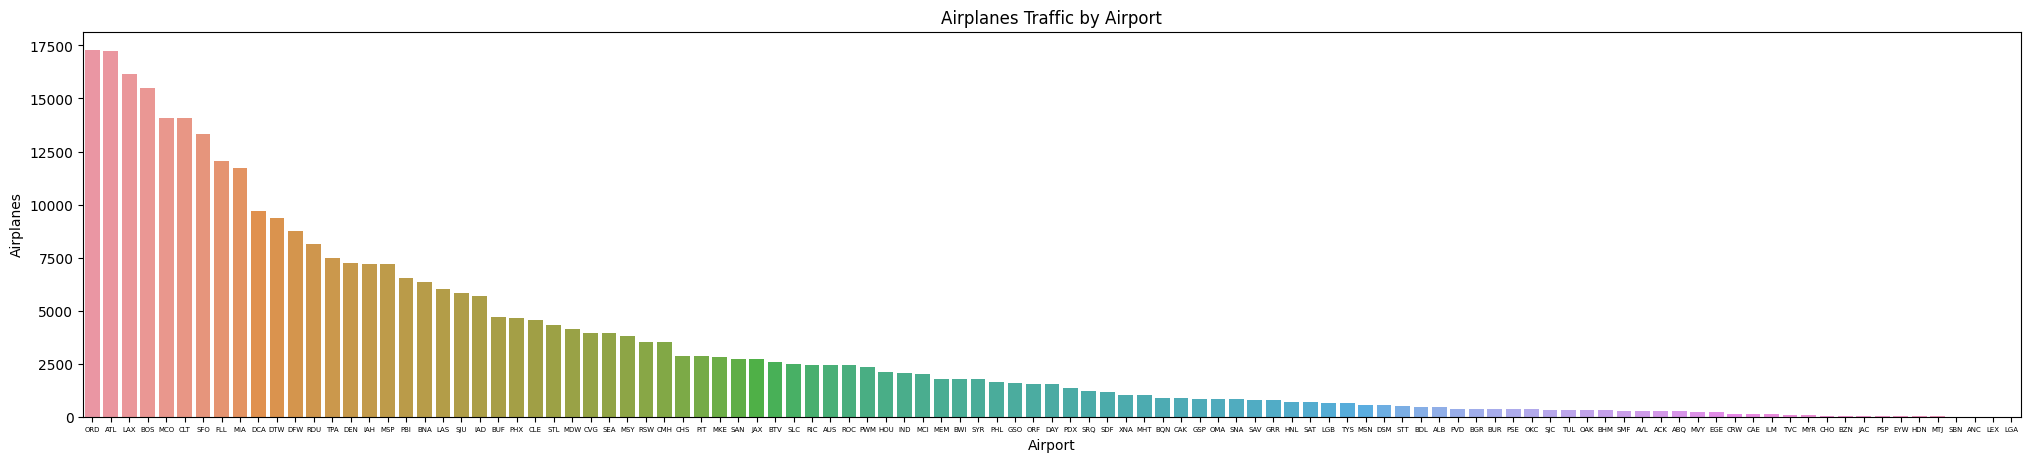

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df  = pd.read_csv('flights.csv')
print(df['dest'].value_counts().head(5))

a = dict(df['dest'].value_counts())
keys,values = list(a.keys()),list(a.values())
data = {'Airport': keys,
        'Passengers': values}
df = pd.DataFrame(data)
plt.figure(figsize=(25, 5))

sns.barplot(x='Airport', y='Passengers', data=df)

plt.xticks(fontsize=5)
plt.xlabel('Airport')
plt.ylabel('Airplanes')
plt.title('Airplanes Traffic by Airport')
plt.show()

## تحلیل داده تاخیر رسیدن پرواز به مقصد نسبت به ساعت

####  داخل تحلیلی که پایین انجام دادیم متوجه میشیم که هرچی به ساعت 22.5 شب نزدیک تر میشیم دقیقه های تاخیر بیشتر میشن که یعنی احتمال این داره که هرچی ما به شب نزدیک تر میشویم احتمال اینکه هواپیما ما به تاخیر بخوره بیشتر است

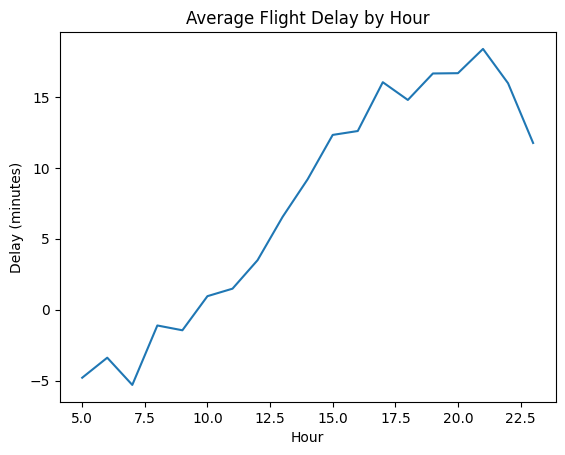

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')

df_delay = df[['arr_delay', 'hour']]
df_delay_avg = df_delay.groupby('hour').mean()


plt.plot(df_delay_avg.index, df_delay_avg.arr_delay)

plt.title('Average Flight Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Delay (minutes)')
plt.show()


# 🙏🌹خسته نباشید  